Notebook 1: Exploratory Data Analysis

Now that we have a good intuitive sense of the data, Next step involves taking a closer look at attributes and data values. In this section, I am getting familiar with the data, which will provide useful knowledge for data pre-processing.



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

#Load libraries for data processing
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm
import seaborn as sns # visualization


plt.rcParams['figure.figsize'] = (15,8) 
plt.rcParams['axes.titlesize'] = 'large'

In [3]:
data = pd.read_csv('clean-data.csv', index_col=False)
data.drop('Unnamed: 0',axis=1, inplace=True)
data.head(2)

,acc_info,duration_month,credit_history,purpose,savings_acc,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner,Group_no
0,A11,6,A34,A43,A65,A75,4.0,A93,A101,4,A121,67.0,A143,A152,2,A173,1,A192,A201,3
1,A12,48,A32,A43,A61,A73,2.0,A92,A101,2,A121,22.0,A143,A152,1,A173,1,A191,A201,1


In [4]:
#basic descriptive statistics
data.describe()

,duration_month,poi,resident_since,age,credits_no,liables,Group_no
count,800.00000,788.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,20.65125,2.950508,2.841250,35.408291,1.396250,1.147500,2.076250
std,12.15635,1.130084,1.106833,11.470281,0.569773,0.354825,0.744062
min,4.00000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.00000,2.000000,2.000000,27.000000,1.000000,1.000000,2.000000
50%,18.00000,3.000000,3.000000,33.000000,1.000000,1.000000,2.000000
75%,24.00000,4.000000,4.000000,41.000000,2.000000,1.000000,3.000000
max,72.00000,4.000000,4.000000,75.000000,4.000000,2.000000,3.000000


In [5]:
data.skew()

C:\Users\vyshn\AppData\Local\Temp\ipykernel_8428\1188251951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


duration_month    1.149158
poi              -0.501067
resident_since   -0.277252
age               1.062419
credits_no        1.267630
liables           1.991872
Group_no         -0.123486
dtype: float64

In [6]:
data.Group_no.unique()

array([3, 1, 2], dtype=int64)

In [7]:
# Group by diagnosis and review the output.
diag_gr = data.groupby('Group_no', axis=0)
pd.DataFrame(diag_gr.size(), columns=['# of observations'])

,# of observations
Group_no,
1,193
2,353
3,254


# 2.3 Unimodal Data Visualizations


Apply 3 techniques that you can use to understand each attribute of your dataset independently.
* Histograms.
* Density Plots.
* Box and Whisker Plots.

C:\Users\vyshn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Group_no', ylabel='count'>

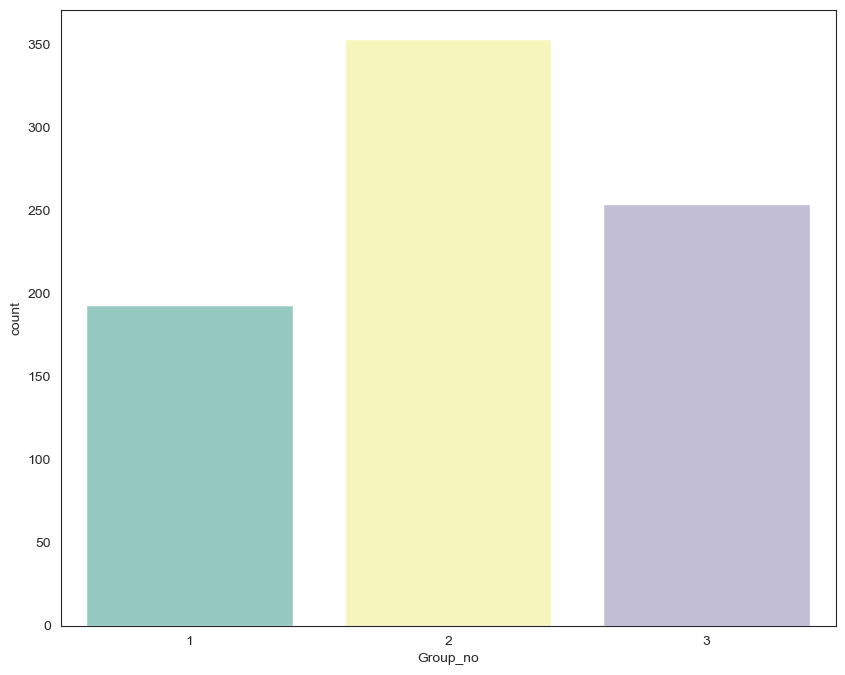

In [8]:
#lets get the frequency of cancer diagnosis
sns.set_style("white")
sns.set_context({"figure.figsize": (10, 8)})
sns.countplot(data['Group_no'],label='Count',palette="Set3")

# EDA for Categorical Variables

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
sns.set_style(style = 'whitegrid')

In [25]:
unique_values = {col: data[col].unique() for col in data.columns}
unique_values_df = pd.DataFrame.from_dict(unique_values, orient='index')
print(unique_values_df)

                    0     1     2     3     4     5     6     7     8     9   \
acc_info           A11   A12   A14   A13  None  None  None  None  None  None   
duration_month       6    48    12    42    24    36    30    15     9    10   
credit_history     A34   A32   A33   A30   A31  None  None  None  None  None   
purpose            A43   A46   A42   A40   A41   A49   A44   A45  A410   A48   
savings_acc        A65   A61   A63   A64   A62  None  None  None  None  None   
employment_st      A75   A73   A74   A71   A72   NaN  None  None  None  None   
poi                4.0   2.0   3.0   1.0   NaN  None  None  None  None  None   
personal_status    A93   A92   A91   A94  None  None  None  None  None  None   
gurantors         A101  A103  A102   NaN  None  None  None  None  None  None   
resident_since       4     2     3     1  None  None  None  None  None  None   
property_type     A121  A122  A124  A123  None  None  None  None  None  None   
age               67.0  22.0  49.0  45.0

In [28]:
# Get the columns with object datatype
object_cols = data.select_dtypes(include='object').columns

# Get the unique values for the object columns
unique_values = {col: data[col].unique() for col in object_cols}

# Create the DataFrame from the dictionary
unique_values_df = pd.DataFrame.from_dict(unique_values, orient='index')

print(unique_values_df)

                     0     1     2     3     4     5     6     7     8     9
acc_info           A11   A12   A14   A13  None  None  None  None  None  None
credit_history     A34   A32   A33   A30   A31  None  None  None  None  None
purpose            A43   A46   A42   A40   A41   A49   A44   A45  A410   A48
savings_acc        A65   A61   A63   A64   A62  None  None  None  None  None
employment_st      A75   A73   A74   A71   A72   NaN  None  None  None  None
personal_status    A93   A92   A91   A94  None  None  None  None  None  None
gurantors         A101  A103  A102   NaN  None  None  None  None  None  None
property_type     A121  A122  A124  A123  None  None  None  None  None  None
installment_type  A143  A141  A142  None  None  None  None  None  None  None
housing_type      A152  A153  A151   NaN  None  None  None  None  None  None
job_type          A173  A172  A174  A171  None  None  None  None  None  None
telephone         A192  A191  None  None  None  None  None  None  None  None

In [30]:
int_cols = data.select_dtypes(include='int64').columns

# Get the unique values for the object columns
unique_values = {col: data[col].unique() for col in int_cols}

# Create the DataFrame from the dictionary
unique_values_df = pd.DataFrame.from_dict(unique_values, orient='index')

print(unique_values_df)

                0   1     2     3     4     5     6     7    8     9   ...  \
duration_month   6  48  12.0  42.0  24.0  36.0  30.0  15.0  9.0  10.0  ...   
resident_since   4   2   3.0   1.0   NaN   NaN   NaN   NaN  NaN   NaN  ...   
credits_no       2   1   3.0   4.0   NaN   NaN   NaN   NaN  NaN   NaN  ...   
liables          1   2   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN  ...   
Group_no         3   1   2.0   NaN   NaN   NaN   NaN   NaN  NaN   NaN  ...   

                 23    24    25    26    27    28   29    30    31    32  
duration_month  4.0  47.0  13.0  22.0  39.0  28.0  5.0  26.0  72.0  40.0  
resident_since  NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN  
credits_no      NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN  
liables         NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN  
Group_no        NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN  

[5 rows x 33 columns]


# 

In [31]:
flt_cols = data.select_dtypes(include='float64').columns

# Get the unique values for the object columns
unique_values = {col: data[col].unique() for col in flt_cols}

# Create the DataFrame from the dictionary
unique_values_df = pd.DataFrame.from_dict(unique_values, orient='index')

print(unique_values_df)

       0     1     2     3     4     5     6     7     8     9   ...    44  \
poi   4.0   2.0   3.0   1.0   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
age  67.0  22.0  49.0  45.0  53.0  35.0  61.0  28.0  25.0  24.0  ...  65.0   

       45    46    47    48    49    50    51    52    53  
poi   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
age  74.0  68.0  43.0  55.0  64.0  75.0  19.0  62.0  59.0  

[2 rows x 54 columns]


In [34]:
# Get the count of values below 18 in the 'age' column
num_below_18 = (data['age'] <= 18).sum()

if num_below_18 > 0:
    print(f"There are {num_below_18} values in the 'age' column below 18.")
else:
    print("All values in the 'age' column are 18 or above.")

All values in the 'age' column are 18 or above.


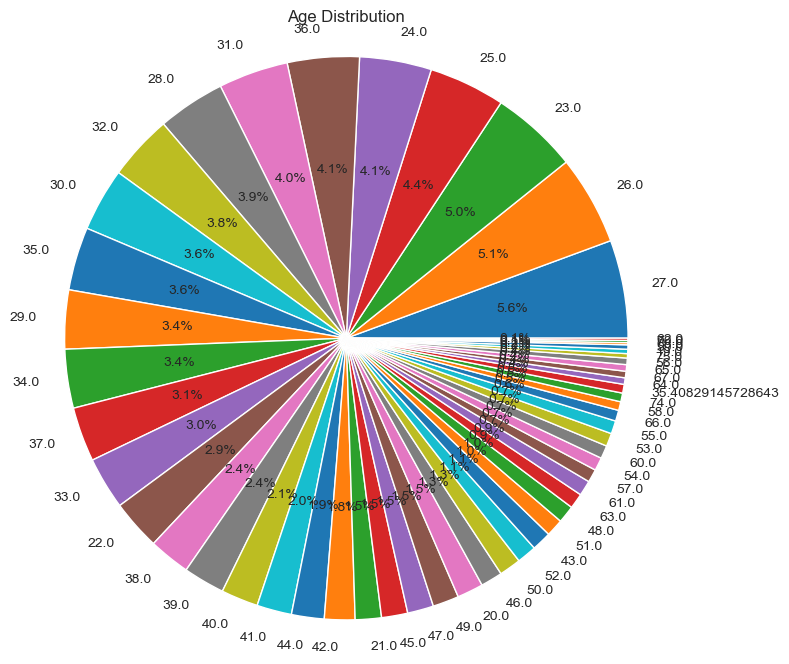

In [35]:
age_counts = data['age'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%')
plt.title('Age Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is circular.
plt.show()

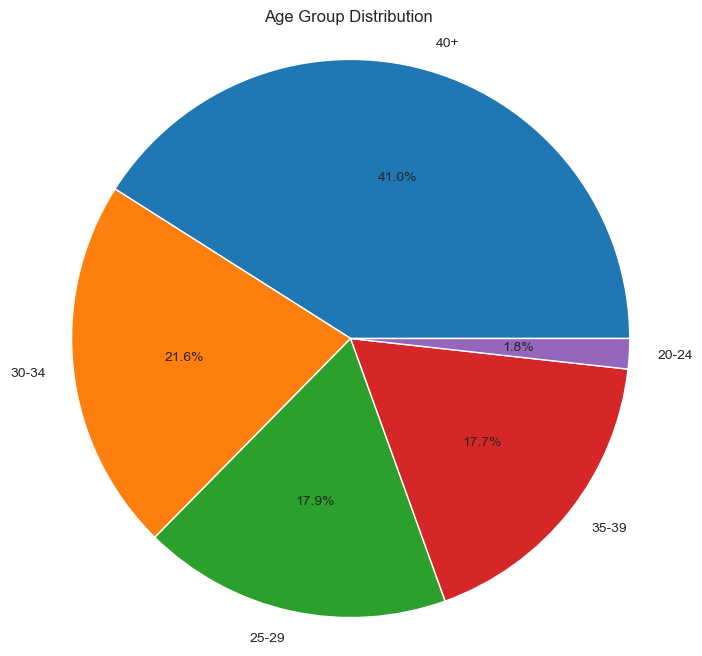

In [36]:


# Define the age groups
age_bins = [0, 20, 25, 30, 35, float('inf')]
age_labels = ['20-24', '25-29', '30-34', '35-39', '40+']

# Bin the ages and count the number of values in each bin
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels)
age_group_counts = data['age_group'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%')
plt.title('Age Group Distribution')
plt.axis('equal')
plt.show()

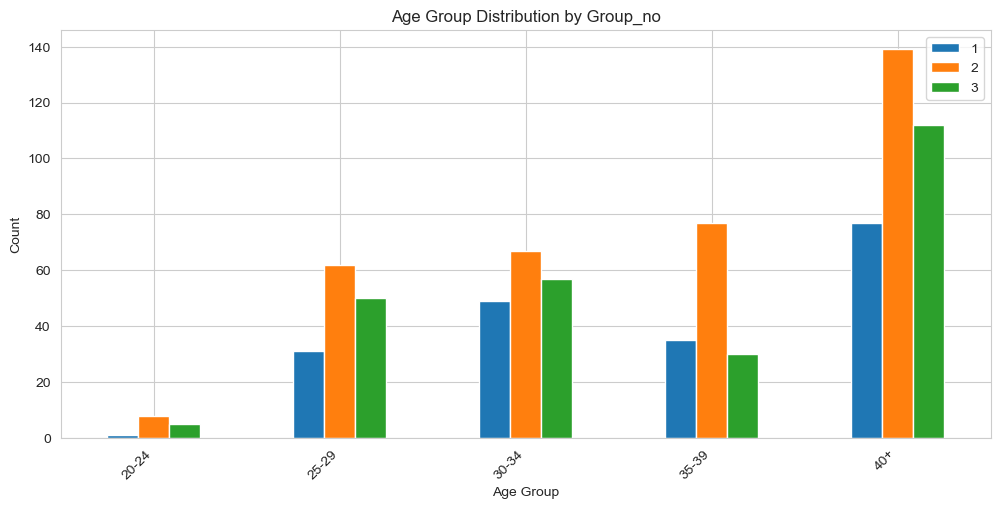

In [37]:


# Define the age groups
age_bins = [0, 20, 25, 30, 35, float('inf')]
age_labels = ['20-24', '25-29', '30-34', '35-39', '40+']

# Bin the ages and count the number of values in each bin
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels)
age_group_counts = data.groupby(['age_group', 'Group_no']).size().unstack(fill_value=0)

# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the bar chart
age_group_counts.plot(kind='bar', ax=ax)

# Set the title and axis labels
ax.set_title('Age Group Distribution by Group_no')
ax.set_xlabel('Age Group')
ax.set_ylabel('Count')

# Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')

# Add a legend
ax.legend()

# Adjust the spacing
plt.subplots_adjust(bottom=0.2)

plt.show()

# 

In [11]:
ds_cat = data.select_dtypes(include = 'object').copy()
ds_cat.head(2)

,acc_info,credit_history,purpose,savings_acc,employment_st,personal_status,gurantors,property_type,installment_type,housing_type,job_type,telephone,foreigner
0,A11,A34,A43,A65,A75,A93,A101,A121,A143,A152,A173,A192,A201
1,A12,A32,A43,A61,A73,A92,A101,A121,A143,A152,A173,A191,A201


In [23]:
ds_cat.shape

(800, 13)

Basic Stats for each variable

In [12]:
len(ds_cat['acc_info'].unique())

4

In [14]:
ds_cat['acc_info'].unique()

array(['A11', 'A12', 'A14', 'A13'], dtype=object)

In [27]:
data['duration_month'].unique()

array([ 6, 48, 12, 42, 24, 36, 30, 15,  9, 10,  7, 60, 18, 45, 11, 27,  8,
       54, 20, 14, 33, 21, 16,  4, 47, 13, 22, 39, 28,  5, 26, 72, 40],
      dtype=int64)

Percentage of Missing Values in that variable

In [17]:
nrow, ncol = data.shape
nrow, ncol

(800, 20)

In [19]:
ds_cat['acc_info'].isnull().sum()/ nrow

#Let's multiple by 100 and keep only 1 decimal places
(ds_cat['acc_info'].isnull().sum()/ nrow).round(3)*100

0.0

<AxesSubplot:xlabel='acc_info', ylabel='count'>

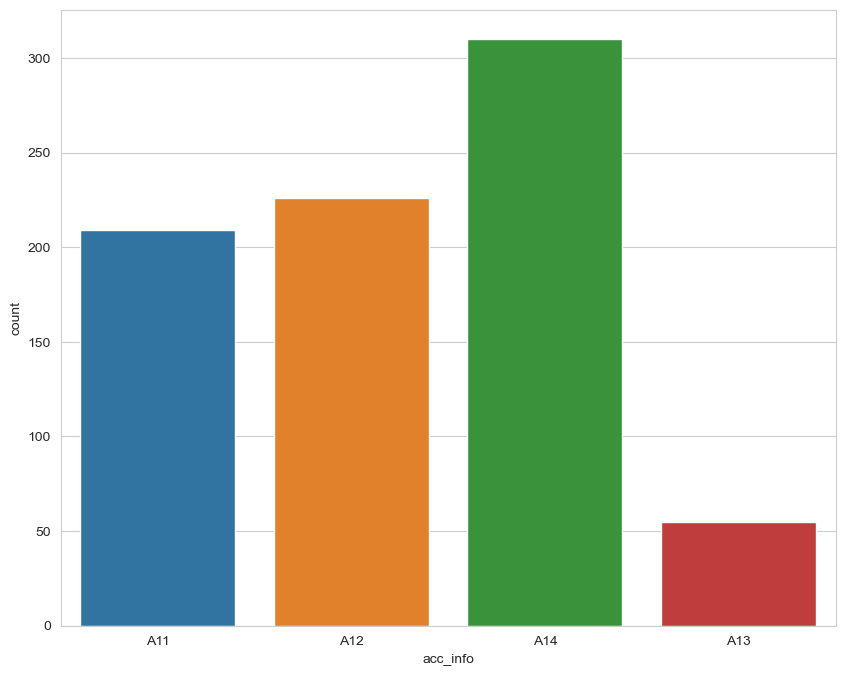

In [20]:
sns.countplot(data = ds_cat, x = 'acc_info')

In [5]:
dta=pd.read_csv('CTtrain.csv', index_col=False)
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sno               800 non-null    int64  
 1   acc_info          800 non-null    object 
 2   duration_month    800 non-null    int64  
 3   credit_history    800 non-null    object 
 4   purpose           800 non-null    object 
 5   savings_acc       800 non-null    object 
 6   employment_st     792 non-null    object 
 7   poi               788 non-null    float64
 8   personal_status   800 non-null    object 
 9   gurantors         792 non-null    object 
 10  resident_since    800 non-null    int64  
 11  property_type     800 non-null    object 
 12  age               796 non-null    float64
 13  installment_type  800 non-null    object 
 14  housing_type      793 non-null    object 
 15  credits_no        800 non-null    int64  
 16  job_type          800 non-null    object 
 1

In [7]:
data = dta.assign(id=dta['sno']) 

In [8]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sno               800 non-null    int64  
 1   acc_info          800 non-null    object 
 2   duration_month    800 non-null    int64  
 3   credit_history    800 non-null    object 
 4   purpose           800 non-null    object 
 5   savings_acc       800 non-null    object 
 6   employment_st     792 non-null    object 
 7   poi               788 non-null    float64
 8   personal_status   800 non-null    object 
 9   gurantors         792 non-null    object 
 10  resident_since    800 non-null    int64  
 11  property_type     800 non-null    object 
 12  age               796 non-null    float64
 13  installment_type  800 non-null    object 
 14  housing_type      793 non-null    object 
 15  credits_no        800 non-null    int64  
 16  job_type          800 non-null    object 
 1

### Separate columns into smaller dataframes to perform visualization

In [12]:
import pandas as pd  # Assuming you have pandas imported

# Break up columns into groups

data_id_diag = data.loc[:, ["sno", "Group_no"]]  # Select 'sno' and 'Group_no' columns
data_diag = data.loc[:, ["Group_no"]]  # Select only 'Group_no' column (may be redundant)

# Separate data by suffix

data_mean = data.iloc[:, 1:11]  # Select columns from index 1 (inclusive) to 10 (exclusive)
data_se = data.iloc[:, 11:22]   # Select columns from index 11 (inclusive) to 21 (exclusive)
data_worst = data.iloc[:, 23:]  # Select columns from index 23 onwards

# Print column names

print(data_id_diag.columns) 


Index(['sno', 'Group_no'], dtype='object')


In [13]:
print(data_mean.columns)  
print(data_se.columns)
print(data_worst.columns)

Index(['acc_info', 'duration_month', 'credit_history', 'purpose',
       'savings_acc', 'employment_st', 'poi', 'personal_status', 'gurantors',
       'resident_since'],
      dtype='object')
Index(['property_type', 'age', 'installment_type', 'housing_type',
       'credits_no', 'job_type', 'liables', 'telephone', 'foreigner',
       'Group_no', 'id'],
      dtype='object')
Index([], dtype='object')


### Histogram the "_mean" suffix designition

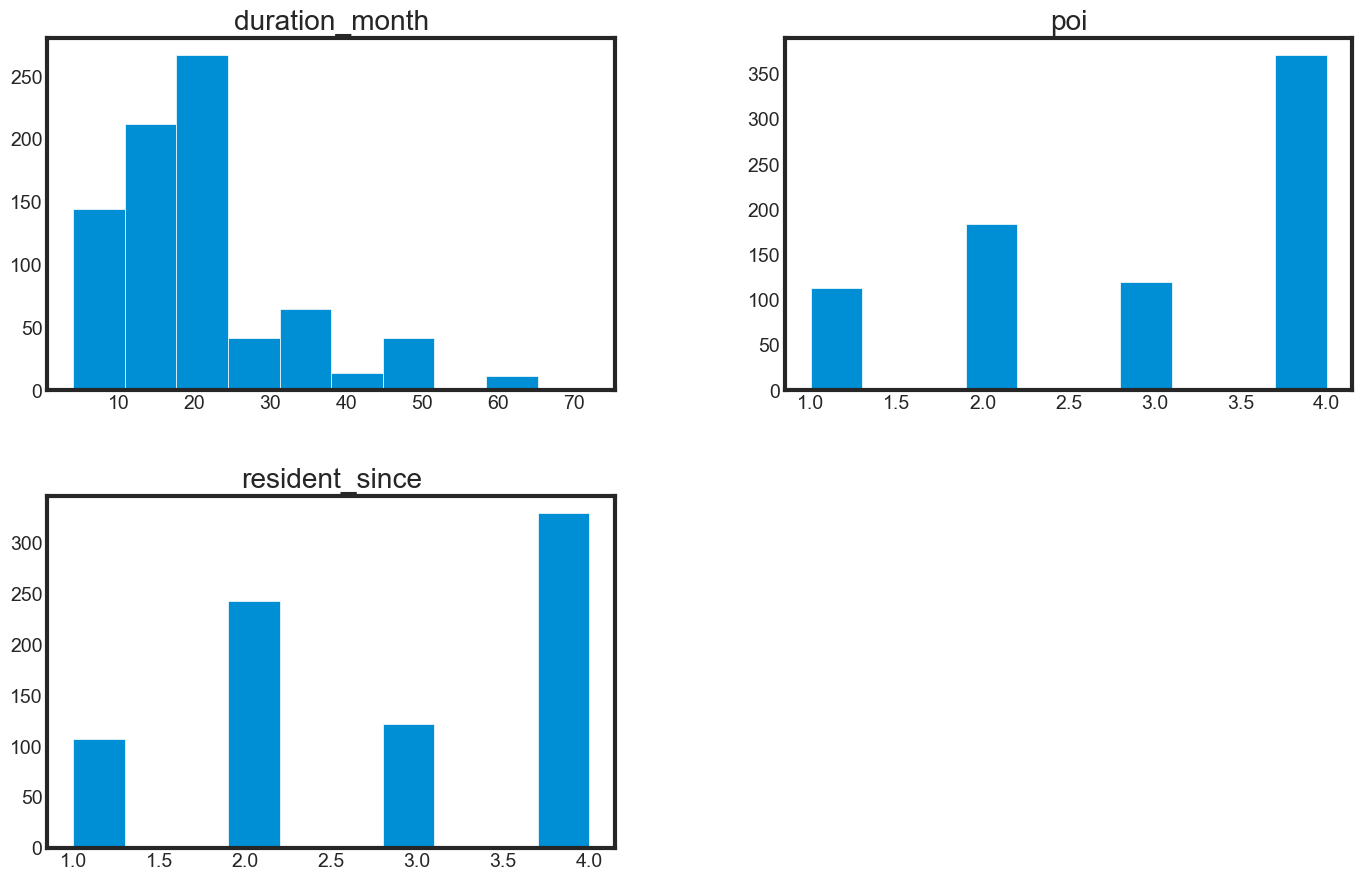

In [14]:
#Plot histograms of CUT1 variables
hist_mean=data_mean.hist(bins=10, figsize=(15, 10),grid=False,)

#Any individual histograms, use this:
#df_cut['radius_worst'].hist(bins=100)

### __Histogram for  the "_se" suffix designition__

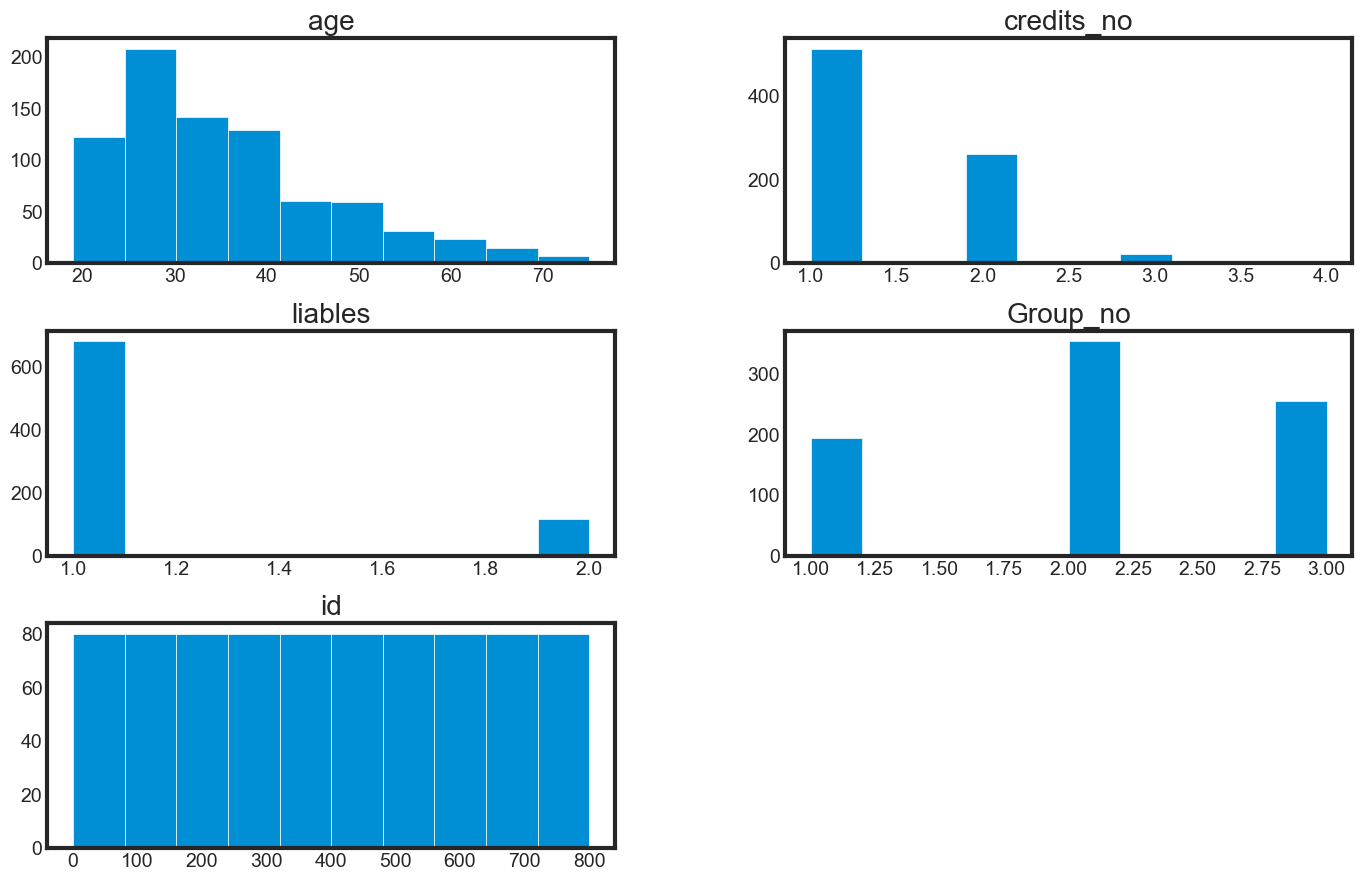

In [15]:
#Plot histograms of _se variables
hist_se=data_se.hist(bins=10, figsize=(15, 10),grid=False,)

### __Histogram "_worst" suffix designition__

In [17]:
#Plot histograms of _worst variables
#hist_worst=data_worst.hist(bins=10, figsize=(15, 10),grid=False,)

## 2.3.2 Visualize distribution of data via density plots

### Density plots "_mean" suffix designition

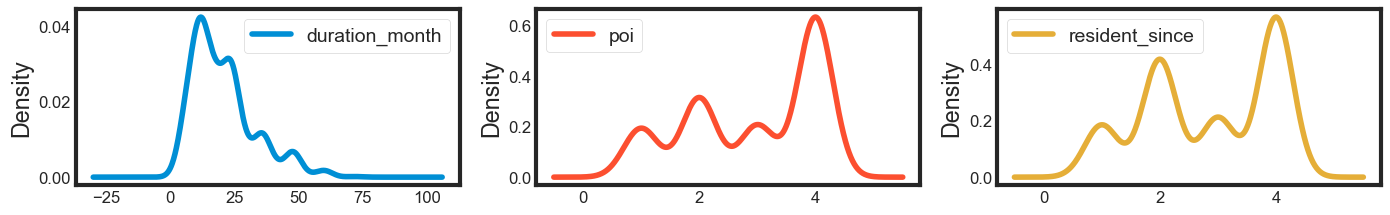

In [18]:
#Density Plots
plt = data_mean.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
                     sharey=False,fontsize=12, figsize=(15,10))


### Density plots "_se" suffix designition

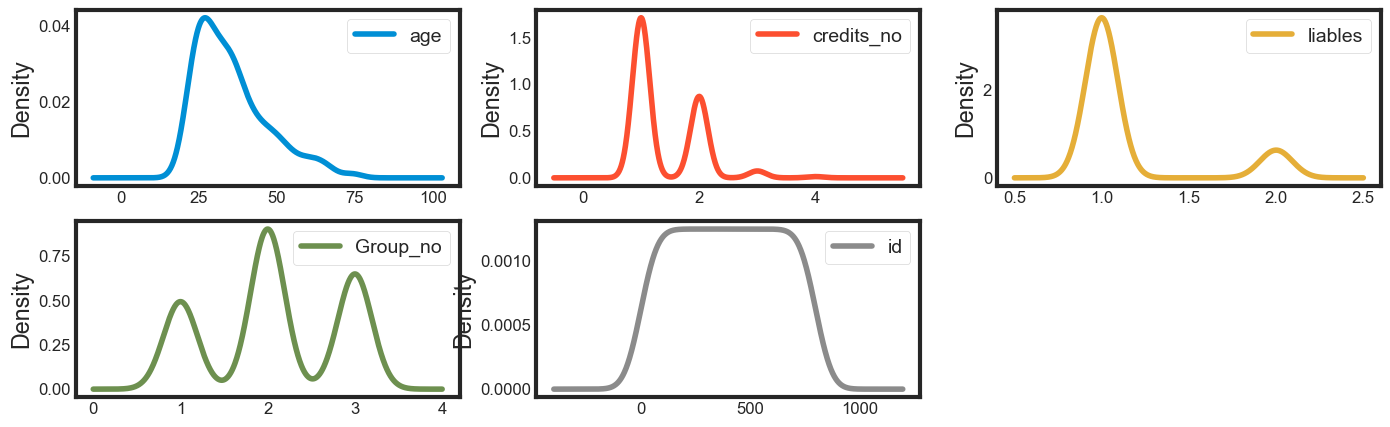

In [24]:
#Density Plots
plt = data_se.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
                     sharey=False,fontsize=12, figsize=(15,10))


### Density plot "_worst" suffix designition

In [14]:
#Density Plots
#plt = data_worst.plot(kind= 'kde', subplots=True, layout=(4,3), sharex=False, sharey=False,fontsize=5, 
#                     figsize=(15,10))


## 2.3.3 Visualise distribution of data via box plots

### Box plot "_mean" suffix designition

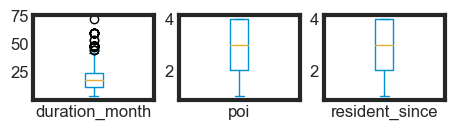

In [25]:
# box and whisker plots
plt=data_mean.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=12)

### Box plot "_se" suffix designition

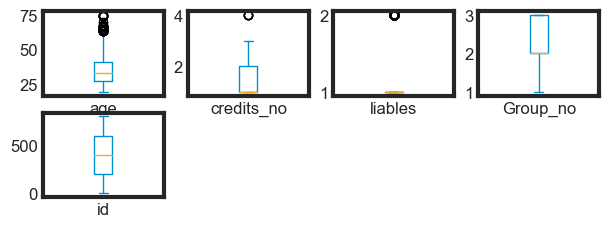

In [26]:
# box and whisker plots
plt=data_se.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=12)

# 2.4 Multimodal Data Visualizations
* Scatter plots
* Correlation matrix

### Correlation matrix

<AxesSubplot:title={'center':'Credit Score Feature Correlation'}>

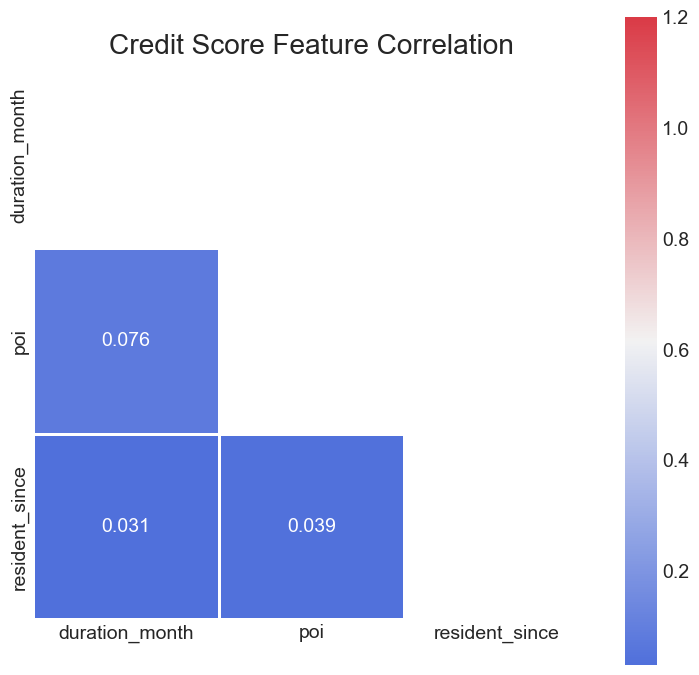

In [21]:
# plot correlation matrix
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')
sns.set_style("white")

data = pd.read_csv('clean-data.csv', index_col=False)
data.drop('Unnamed: 0',axis=1, inplace=True)
# Compute the correlation matrix
corr = data_mean.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
data, ax = plt.subplots(figsize=(8, 8))
plt.title('Credit Score Feature Correlation')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask=mask, 
            ax=ax,annot=True, fmt='.2g',linewidths=2)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        800 non-null    int64  
 1   acc_info          800 non-null    object 
 2   duration_month    800 non-null    int64  
 3   credit_history    800 non-null    object 
 4   purpose           800 non-null    object 
 5   savings_acc       800 non-null    object 
 6   employment_st     792 non-null    object 
 7   poi               788 non-null    float64
 8   personal_status   800 non-null    object 
 9   gurantors         792 non-null    object 
 10  resident_since    800 non-null    int64  
 11  property_type     800 non-null    object 
 12  age               800 non-null    float64
 13  installment_type  800 non-null    object 
 14  housing_type      793 non-null    object 
 15  credits_no        800 non-null    int64  
 16  job_type          800 non-null    object 
 1

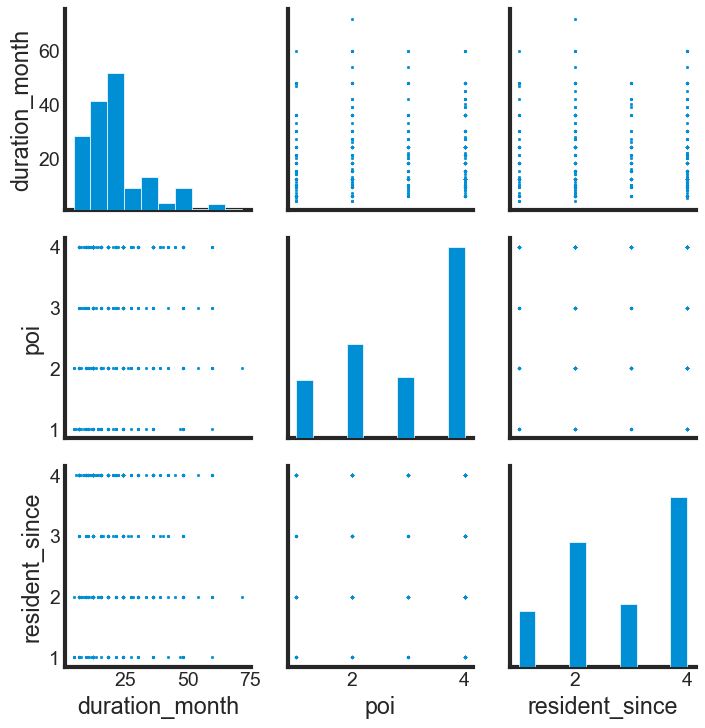

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styles (optional)
plt.style.use('fivethirtyeight')
sns.set_style("white")

# Read CSV data
data = pd.read_csv('clean-data.csv', index_col=False)

# Select multiple columns for PairGrid
data_subset = data[[data.columns[2], data.columns[7], data.columns[10]]]

# Create PairGrid
g = sns.PairGrid(data_subset)

# Configure the PairGrid (optional)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter, s=3)

# Display the plot
plt.show()


In [32]:
df = pd.read_csv('clean-data.csv', index_col=False)

In [34]:
df['acc_info'] = df['acc_info'].astype('category').cat.codes 

#df['Self_Employed'] =df['Self_Employed'].astype('category').cat.codes
#df['Area'] =df['Area'].astype('category').cat.codes
#df['Loan Status'] =df['Loan Status'].astype('category').cat.codes

In [35]:
df['acc_info']

0      0
1      1
2      3
3      0
4      0
      ..
795    3
796    0
797    3
798    3
799    1
Name: acc_info, Length: 800, dtype: int8

In [36]:
df['credit_history'] =df['credit_history'].astype('category').cat.codes
df['credit_history']

0      4
1      2
2      4
3      2
4      3
      ..
795    2
796    2
797    4
798    3
799    2
Name: credit_history, Length: 800, dtype: int8

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        800 non-null    int64  
 1   acc_info          800 non-null    int8   
 2   duration_month    800 non-null    int64  
 3   credit_history    800 non-null    int8   
 4   purpose           800 non-null    object 
 5   savings_acc       800 non-null    object 
 6   employment_st     792 non-null    object 
 7   poi               788 non-null    float64
 8   personal_status   800 non-null    object 
 9   gurantors         792 non-null    object 
 10  resident_since    800 non-null    int64  
 11  property_type     800 non-null    object 
 12  age               800 non-null    float64
 13  installment_type  800 non-null    object 
 14  housing_type      793 non-null    object 
 15  credits_no        800 non-null    int64  
 16  job_type          800 non-null    object 
 1

In [38]:
df['purpose'] =df['purpose'].astype('category').cat.codes
df['purpose']

0      4
1      4
2      7
3      3
4      0
      ..
795    3
796    1
797    3
798    0
799    0
Name: purpose, Length: 800, dtype: int8

In [39]:
df['savings_acc'] =df['savings_acc'].astype('category').cat.codes
df['savings_acc']

0      4
1      0
2      0
3      0
4      0
      ..
795    1
796    4
797    0
798    4
799    4
Name: savings_acc, Length: 800, dtype: int8

In [40]:
df['employment_st'] =df['employment_st'].astype('category').cat.codes
df['employment_st']

0      4
1      2
2      3
3      3
4      2
      ..
795    1
796    4
797    1
798    4
799    1
Name: employment_st, Length: 800, dtype: int8

In [41]:
df['personal_status'] =df['personal_status'].astype('category').cat.codes
df['personal_status']

0      2
1      1
2      2
3      2
4      2
      ..
795    1
796    2
797    1
798    3
799    2
Name: personal_status, Length: 800, dtype: int8

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        800 non-null    int64  
 1   acc_info          800 non-null    int8   
 2   duration_month    800 non-null    int64  
 3   credit_history    800 non-null    int8   
 4   purpose           800 non-null    int8   
 5   savings_acc       800 non-null    int8   
 6   employment_st     800 non-null    int8   
 7   poi               788 non-null    float64
 8   personal_status   800 non-null    int8   
 9   gurantors         792 non-null    object 
 10  resident_since    800 non-null    int64  
 11  property_type     800 non-null    object 
 12  age               800 non-null    float64
 13  installment_type  800 non-null    object 
 14  housing_type      793 non-null    object 
 15  credits_no        800 non-null    int64  
 16  job_type          800 non-null    object 
 1

In [43]:
object_cols = df.select_dtypes(include=['object'])

# Convert object columns to categorical and assign codes
for col in object_cols:
    df[col] = df[col].astype('category').cat.codes

print(df)

     Unnamed: 0  acc_info  duration_month  credit_history  purpose  \
0             0         0               6               4        4   
1             1         1              48               2        4   
2             2         3              12               4        7   
3             3         0              42               2        3   
4             4         0              24               3        0   
..          ...       ...             ...             ...      ...   
795         795         3               9               2        3   
796         796         0              18               2        1   
797         797         3              12               4        3   
798         798         3              24               3        0   
799         799         1               9               2        0   

     savings_acc  employment_st  poi  personal_status  gurantors  ...  \
0              4              4  4.0                2          0  ...   
1            

In [44]:
df[df.columns[1:]].corr()['Group_no'][:]

acc_info            0.018239
duration_month     -0.588725
credit_history      0.002485
purpose            -0.031545
savings_acc        -0.016609
employment_st      -0.010007
poi                 0.260865
personal_status    -0.014649
gurantors           0.016876
resident_since     -0.026316
property_type      -0.296965
age                -0.003826
installment_type    0.030340
housing_type       -0.113976
credits_no         -0.056597
job_type           -0.299299
liables            -0.009469
telephone          -0.255166
foreigner           0.111158
Group_no            1.000000
Name: Group_no, dtype: float64

In [45]:
import pandas as pd

# Assuming your DataFrame is named 'df' and contains the correlation coefficients

# Save to CSV file
df.to_csv('correlation_coefficients.csv', index=False)  # Replace with desired filename
